In [1]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pytrends = TrendReq(hl='en-US', tz=360, timeout=(10,25))

In [3]:
def getdata(term):
	kw_list = [term]
	pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')
	df = pytrends.interest_over_time()
	return df

In [4]:
def plotdata(term):
    df = getdata(term)
    df.plot()

In [5]:
stocks = pd.read_csv("data/daily_stocks.csv")

/home/clearly/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
newstocks = stocks[stocks['date']>20150000] # Restrict to data after 2015

In [7]:
newstocks.head()

,PERMNO,date,TICKER,BIDLO,ASKHI,PRC,BID,ASK,OPENPRC,RETX
2014,10026,20150102,JJSF,106.810,109.446,107.69,107.45,107.69,109.18,-0.009929
2015,10026,20150105,JJSF,106.760,108.430,107.24,107.25,107.39,107.41,-0.004179
2016,10026,20150106,JJSF,106.185,108.690,107.27,107.25,107.55,107.84,0.000280
2017,10026,20150107,JJSF,106.495,108.770,108.73,108.62,108.75,107.70,0.013611
2018,10026,20150108,JJSF,109.110,111.280,110.32,110.31,110.71,109.48,0.014623


In [15]:
def find_date_string(row):
    ds = str(row['date']-1)
    dates = ds[:4] + "-" + ds[4:6] + "-" + ds[6:]
    return dates

In [16]:
def getdf(searches, ticker):
    df = newstocks[newstocks["TICKER"]==ticker]
    df['date_string'] = df.apply(lambda row: find_date_string(row), axis=1)
    trends_data = getdata(searches[0])
    for i in range(1, len(searches)):
        s = searches[i]
        newtrends = getdata(s)
        trends_data = trends_data.join(newtrends, rsuffix='_'+s)
    s = set(trends_data.index.values)
    s = set([str(x)[:10] for x in s])
    df = df[df['date_string'].isin(s)]
    df.plot(y='BID')
    for s in searches:
        df[s] = df.apply(lambda row: trends_data.loc[row['date_string']][s], axis=1)
        df.plot(y=s)
    print(df)
    return df

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
def easy(ticker):
    features = ["buy " + ticker, "sell " + ticker, ticker]
    data = getdf(features, ticker)
    X = pd.DataFrame(data, columns=features)
    y = data['BID']
    lm = LinearRegression()
    model = lm.fit(X,y)
    print(lm.score(X,y))
    

/home/clearly/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
         PERMNO      date TICKER       BIDLO       ASKHI         PRC  \
8125309   90319  20150105  GOOGL   517.75000   527.98993   519.46002   
8125314   90319  20150112  GOOGL   490.91000   500.28000   497.06000   
8125323   90319  20150126  GOOGL   532.07001   541.50000   536.71997   
8125328   90319  20150202  GOOGL   521.71997   536.50000   532.20001   
8125333   90319  20150209  GOOGL   527.54999   533.88000   529.28003   
...         ...       ...    ...         ...         ...         ...   
8126295   90319  20181203  GOOGL  1111.72998  1135.00

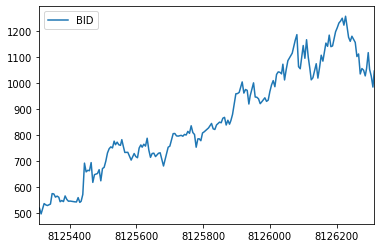

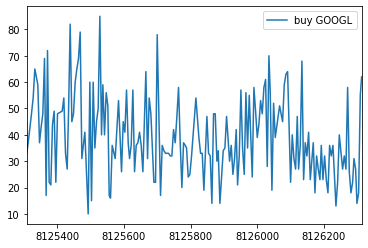

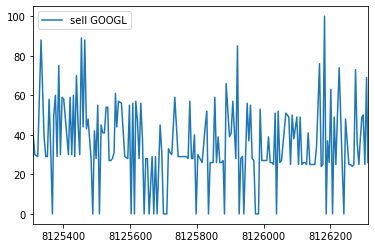

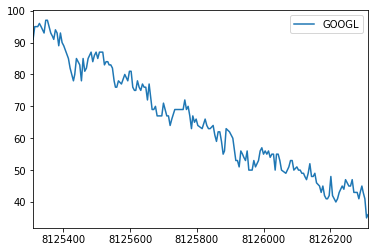

In [19]:
easy("GOOGL")

TypeError: getdf() missing 1 required positional argument: 'ticker'

In [20]:
getdf("TSLA")

TypeError: getdf() missing 1 required positional argument: 'ticker'

In [0]:
d = getdata('MSFT')

,MSFT,isPartial
date,,
2014-12-07,18,False
2014-12-14,18,False
2014-12-21,15,False
2014-12-28,14,False
2015-01-04,16,False
...,...,...
2019-10-27,74,False
2019-11-03,52,False
2019-11-10,55,False
